In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

### Clinical data

In [37]:
clinical_biochem = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Biochemistry_August_2023.csv') #blood test measurements
clinical_DST = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_DST_August_2023.csv') # mostly empty
clinical_patient = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Patient_Cases_August_2023.csv') # body, background, diagnostic detail
clinical_regimens = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Regimens_August_2023.csv') #outcome. drug regimen, same patient id number as clinical_patient as cases
clinical_specimen = pd.read_csv('../Clinical/TB_Portals_Published_Clinical_Data_August_2023/TB_Portals_Specimen_August_2023.csv') # collection dates and source - no use

/var/folders/78/zn54_c9d2jb_8j8xx5s59dqw0000gn/T/ipykernel_98726/730962421.py:2: DtypeWarning:

Columns (33,40,41,55,60,61,63,65,66,68,69,71,72,74,82,100,102,106,107,108,109,110,111,113,119,127,128,129,133,135,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/78/zn54_c9d2jb_8j8xx5s59dqw0000gn/T/ipykernel_98726/730962421.py:3: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [38]:
clinical_patient = clinical_patient.drop(columns=['education', 'image_body_site', 'dissemination', 'lungcavity_size', 'anomaly_of_mediastinum_vessels_develop', 'affect_pleura', 'shadow_pattern', 'affect_level', 'pneumothorax', 'plevritis', 'affected_segments', 'nodicalcinatum', 'process_prevalence', 'thromboembolism_of_the_pulmonaryartery', 'posttbresiduals', 'lung_capacity_decrease', 'bronchial_obstruction', 'anomaly_of_lungdevelop', 'accumulation_of_contrast', 'limfoadenopatia', 'totalcavernum', 'bactec_test', 'le_test', 'hain_test', 'lpaother_test', 'genexpert_test', 'bactec_isoniazid', 'bactec_rifampicin', 'bactec_streptomycin', 'bactec_ethambutol', 'bactec_ofloxacin', 'bactec_capreomycin', 'bactec_amikacin', 'bactec_kanamycin', 'bactec_pyrazinamide', 'bactec_levofloxacin', 'bactec_moxifloxacin', 'bactec_p_aminosalicylic_acid', 'bactec_prothionamide', 'bactec_cycloserine', 'bactec_amoxicillin_clavulanate', 'bactec_mycobutin', 'bactec_delamanid', 'bactec_bedaquiline', 'bactec_imipenem_cilastatin', 'bactec_linezolid', 'bactec_clofazimine', 'bactec_clarithromycin', 'bactec_fluoroquinolones', 'bactec_aminoglycosides_injectible_agents', 'le_isoniazid', 'le_rifampicin', 'le_streptomycin', 'le_ethambutol', 'le_ofloxacin', 'le_capreomycin', 'le_amikacin', 'le_kanamycin', 'le_pyrazinamide', 'le_levofloxacin', 'le_moxifloxacin', 'le_p_aminosalicylic_acid', 'le_prothionamide', 'le_cycloserine', 'le_amoxicillin_clavulanate', 'le_mycobutin', 'le_delamanid', 'le_bedaquiline', 'le_imipenem_cilastatin', 'le_linezolid', 'le_clofazimine', 'le_clarithromycin', 'le_fluoroquinolones', 'le_aminoglycosides_injectible_agents', 'hain_isoniazid', 'hain_rifampicin', 'hain_streptomycin', 'hain_ethambutol', 'hain_ofloxacin', 'hain_capreomycin', 'hain_amikacin', 'hain_kanamycin', 'hain_pyrazinamide', 'hain_levofloxacin', 'hain_moxifloxacin', 'hain_p_aminosalicylic_acid', 'hain_prothionamide', 'hain_cycloserine', 'hain_amoxicillin_clavulanate', 'hain_mycobutin', 'hain_delamanid', 'hain_bedaquiline', 'hain_imipenem_cilastatin', 'hain_linezolid', 'hain_clofazimine', 'hain_clarithromycin', 'hain_fluoroquinolones', 'hain_aminoglycosides_injectible_agents', 'lpaother_isoniazid', 'lpaother_rifampicin', 'lpaother_streptomycin', 'lpaother_ethambutol', 'lpaother_ofloxacin', 'lpaother_capreomycin', 'lpaother_amikacin', 'lpaother_kanamycin', 'lpaother_pyrazinamide', 'lpaother_levofloxacin', 'lpaother_moxifloxacin', 'lpaother_p_aminosalicylic_acid', 'lpaother_prothionamide', 'lpaother_cycloserine', 'lpaother_amoxicillin_clavulanate', 'lpaother_mycobutin', 'lpaother_delamanid', 'lpaother_bedaquiline', 'lpaother_imipenem_cilastatin', 'lpaother_linezolid', 'lpaother_clofazimine', 'lpaother_clarithromycin', 'lpaother_fluoroquinolones', 'lpaother_aminoglycosides_injectible_agents', 'genexpert_isoniazid', 'genexpert_rifampicin', 'truenat_rifampicin', 'stemcell_dose', 'social_risk_factors', 'main_lineage', 'sub_lineage', 'tbp_drug_prediction', 'num_drug_resistant_variants', 'num_other_variants', 'ncbi_sourceorganism', 'ncbi_bioproject', 'ncbi_biosample', 'gene_name', 'qure_bluntedcp', 'qure_abnormal', 'qure_consolidation', 'qure_fibrosis', 'qure_opacity', 'qure_peffusion', 'qure_tuberculosis', 'qure_nodule', 'qure_cavity', 'qure_hilarlymphadenopathy', 'qure_atelectasis', 'uiip_asymmetry_volume', 'uiip_asymmetry_texture', 'uiip_foci_left_lower_sextant', 'uiip_foci_left_middle_sextant', 'uiip_foci_left_upper_sextant', 'uiip_foci_right_lower_sextant', 'uiip_foci_right_middle_sextant', 'uiip_foci_right_upper_sextant', 'uiip_caverns_left_lower_sextant', 'uiip_caverns_left_middle_sextant', 'uiip_caverns_left_upper_sextant', 'uiip_caverns_right_lower_sextant', 'uiip_caverns_right_middle_sextant', 'uiip_caverns_right_upper_sextant']) # drop columns with no data
clinical_regimens = clinical_regimens.drop(columns=['dose','collected','reinfusioned'])
clinical_biochem = clinical_biochem.drop(columns=['Thyroid Stimulating Hormone (miu/l)', 'Hepatitis B Surface Antigen', 'Hepatitis C Virus', 'Free Thyroxine (ng/dl)', 'Glucose: Diabetic Post-Meal (mmol/l)', 'Bilirubin', 'Albumin (g/l)', 'Urea (mmol/l)', 'Alkaline phosphatase (u/l)', 'Lipase (u/l)', 'Activated Partial Thromboplastin Time (seconds)', 'Calcium (mmol/l)', 'International Normalized Ratio', 'Gamma-Glutamyl Transpeptidase (u/l)', 'Sodium (mmol/l)', 'Thrombin Time (seconds)', 'Prothrombin Time (%)', 'Adenosine Deaminase (u/l)', 'C-Reactive Protein (mg/l)', 'Hemoglobin (g/l)', 'Hemoglobin A1c (%)', 'Fasting Blood Sugar (Glucose) (mmol/l)', 'Total Cholesterol (mmol/l)', 'Absolute Neutrophil Count', 'Absolute Lymphocyte Count', 'Absolute Eosinophil Count', 'Neutrophil-lymphocyte ratio'])

In [39]:
def count_not_reported_percentage(df):
    not_reported_percentage = {}
    total_rows = len(df)
    
    for column in df.columns:
        # not_reported_count = df[column].eq('Not Reported').sum()
        not_reported_count = df[column].isna().sum()
        percentage = (not_reported_count / total_rows) * 100
        if percentage >= 30:
            not_reported_percentage[column] = percentage
    print(not_reported_percentage.keys())
    return not_reported_percentage


In [40]:
# print("Unique values for 'patient_id' in clinical_regimens:")
# print(len(clinical_regimens['patient_id'].unique()))
# print(len(clinical_regimens['patient_id']))

# print("Unique values for 'patient_id' in clinical_biochem:")
# print(len(clinical_biochem['patient_id'].unique()))
# print(len(clinical_biochem['patient_id']))

# print("Unique values for 'patient_id' in clinical_patient:")
# print(len(clinical_patient['patient_id'].unique()))
# print(len(clinical_patient['patient_id']))

# print("Unique values for 'condition_id' in clinical_regimens:")
# print(len(clinical_regimens['condition_id'].unique()))
# print(len(clinical_regimens['condition_id']))

# print("Unique values for 'condition_id' in clinical_biochem:")
# print(len(clinical_biochem['condition_id'].unique()))
# print(len(clinical_biochem['condition_id']))

# print("Unique values for 'condition_id' in clinical_patient:")
# print(len(clinical_patient['condition_id'].unique()))
# print(len(clinical_patient['condition_id']))

# print("Unique values for 'patient_id' in clinical_regimens:")
# print(len(clinical_regimens['patient_id'].unique()))
# print(len(clinical_regimens['patient_id']))

# print("Unique values for 'patient_id' in clinical_biochem:")
# print(len(clinical_biochem['patient_id'].unique()))
# print(len(clinical_biochem['patient_id']))

# print("Unique values for 'patient_id' in clinical_patient:")
# print(len(clinical_patient['patient_id'].unique()))
# print(len(clinical_patient['patient_id']))

## merging data

In [41]:
# clinical_patient_cp = clinical_patient.drop(columns=['patient_id'])
# merged_data = clinical_patient_cp.merge(clinical_regimens, on='condition_id', how='left')

# merged_data = merged_data[~merged_data['outcome_cd'].isin(['unknown', 'stillOnTreatment'])]
# merged_data = merged_data.drop(columns = ['identifier','registration_date','case_definition','diagnosis_code','case_definition','diagnosis_code','culturetype','culture'])
# merged_data = merged_data.drop(columns = ['period_start_y','period_end_y','activities_period_start','activities_period_end'])
# merged_data.replace('Not Reported', np.nan, inplace=True)

# columns_to_count = ['collapse', 'smallcavities', 'mediumcavities', 'largecavities', 'isanylargecavitybelongtoamultisextantcavity', 'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity', 'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules', 'mediumnodules', 'largenodules', 'hugenodules', 'isanycalcifiedorpartiallycalcifiednoduleexist', 'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists', 'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules', 'mediumdensitystabalizedfibroticnodules', 'highdensitycalcifiedtypicallysequella']
# for column in columns_to_count:
#     merged_data[column] = merged_data[column].apply(lambda x: x.count("Yes") if not pd.isna(x) else x)
    
# clinical_biochem_cp = clinical_biochem.drop(columns=['patient_id', 'specimen_id', 'observationfhir_id','test_date',	'specimen_collection_site',	'specimen_collection_date'])
# merged_data = clinical_biochem_cp.merge(merged_data, on='condition_id', how='left')
# merged_data = merged_data.drop(columns=['specimen', 'x_ray_exists', 'ct_exists', 'genomic_data_exists','uiip_severity_score','rater', 'x_ray_count',  'organization'])


In [61]:
clinical_patient_cp = clinical_patient.drop(columns=['patient_id'])
# merged_data = clinical_patient_cp.merge(clinical_regimens, on='condition_id', how='left')
clinical_biochem_cp = clinical_biochem.drop(columns=['patient_id', 'specimen_id', 'observationfhir_id','test_date',	'specimen_collection_site',	'specimen_collection_date'])
merged_data = clinical_patient_cp.merge(clinical_biochem_cp, on='condition_id', how='left')

merged_data = merged_data[~merged_data['outcome'].isin(['Lost to follow up', 'Still on treatment','Unknown'])]
# merged_data = merged_data.drop(columns = ['identifier','registration_date','case_definition','diagnosis_code','case_definition','diagnosis_code','culturetype','culture'])
merged_data = merged_data.drop(columns = ['period_start','period_end'])
merged_data = merged_data.drop(columns=['specimen', 'x_ray_exists', 'ct_exists', 'genomic_data_exists','uiip_severity_score','rater', 'x_ray_count',  'organization'])

merged_data.replace('Not Reported', np.nan, inplace=True)

columns_to_count = ['collapse', 'smallcavities', 'mediumcavities', 'largecavities', 'isanylargecavitybelongtoamultisextantcavity', 'canmultiplecavitiesbeseen', 'infiltrate_lowgroundglassdensity', 'infiltrate_mediumdensity', 'infiltrate_highdensity', 'smallnodules', 'mediumnodules', 'largenodules', 'hugenodules', 'isanycalcifiedorpartiallycalcifiednoduleexist', 'isanynoncalcifiednoduleexist', 'isanyclusterednoduleexists', 'aremultiplenoduleexists', 'lowgroundglassdensityactivefreshnodules', 'mediumdensitystabalizedfibroticnodules', 'highdensitycalcifiedtypicallysequella']
for column in columns_to_count:
    merged_data[column] = merged_data[column].apply(lambda x: x.count("Yes") if not pd.isna(x) else x)
    
merged_data = merged_data.drop(columns=['identifier', 'registration_date','case_definition', 'diagnosis_code','status', 'culture', 'culturetype','microscopy'])

In [62]:
def Label_encoding(employment_data, input, missing=False):
    # Initialize the LabelEncoder
    if missing:
        employment_data = employment_data + [missing]
        input.fillna(missing, inplace=True)

    label_encoder = LabelEncoder()

    label_encoder.fit(employment_data)
    output = label_encoder.transform(input)
    # Replace np.nan with a placeholder, for example, 'Missing'
    missing_ind = len(employment_data)-1
    output1 = []
    if missing:
        # output = [x if x == missing_ind else np.NaN for x in output]
        for x in output:
            if x == missing_ind or pd.isna(x):
                output1.append(np.NaN)
            else:
                output1.append(x)
        output = output1
    # Fit and transform the data
    return output

## Orgnaising comorbidity

In [63]:
# _  = []
# for x in merged_data['comorbidity']:
#     if x == 'None':
#         pass
#     elif pd.isna(x):
#         pass
#     elif ',' not in x:
#         _.extend([x])
    
#     else:
#         _.extend(x.split(', '))
# np.unique(_)

In [64]:
# List of drugs for binary encoding
drugs = ['Not_specified', 'Others', 'cytostatics', 'TNF-α antagonists', 'Systemically administered glucocorticoids', 'Psychiatric illness', 'Pneumoconiosis', 'Anemia', 'Hepatitis B/C', 'Hepatic diseases', 'Renal disease', 'Diabetes', 'Post-COVID-19', 'COVID-19', 'HIV']
# Removing duplicates by converting the list to a set and back to a list to preserve order
unique_drugs = list(dict.fromkeys(drugs))

# Assigning binary encoding values

def encode_drugs(drug_list):
    outlist = []
    for x in drug_list:
        if pd.isna(x) or x == 'None':
            outlist.append([0]*len(drugs))
        else:
            _ = x.split(', ')
            _ohe = [1 if y in _ else 0 for y in drugs]
            outlist.append(_ohe)
    # transposed_list = list(map(list, zip(*outlist)))
    df = pd.DataFrame(outlist, columns=drugs)
    return df

# Apply the encoding to each record in the dataset
encoded_data = encode_drugs(merged_data['comorbidity'])
encoded_data.reset_index(drop=True, inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data = pd.concat([merged_data, encoded_data], axis=1)
merged_data = merged_data.drop(columns=['comorbidity'])

In [46]:
# # List of drugs for binary encoding
# drugs = ['Amoxicillin-clavulanate', 'Antiretroviral therapy',
#        'Bedaquiline', 'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid',
#        'Ethambutol', 'Ethionamide', 'Fluoroquinolones',
#        'Gatifloxacin', 'Imipenem-cilastatin',
#        'Isoniazid', 'Kanamycin', 'Levofloxacin', 'Linezolid',
#        'Moxifloxacin', 'Mycobutin', 'Ofloxacin', 'Pretomanid',
#        'Prothionamide', 'Pyrazinamide', 'Rifampicin', 'Streptomycin',
#        'Terizidone', 'p-aminosalicylic acid', 'Amikacin',
#        'Aminoglycosides - injectible agents', 'Amoxicillin-clavulanate',
#        'Antiretroviral therapy', 'Bedaquiline', 'Capreomycin',
#        'Clarithromycin', 'Clofazimine', 'Cotrimoxazol preventive',
#        'Cycloserine', 'Ethambutol', 'Fluoroquinolones', 'Isoniazid',
#        'Kanamycin', 'Levofloxacin', 'Rifampicin']

# # Removing duplicates by converting the list to a set and back to a list to preserve order
# unique_drugs = list(dict.fromkeys(drugs))

# # Assigning binary encoding values
# binary_encoding = {drug: 2**i for i, drug in enumerate(unique_drugs)}

# def encode_drugs(drug_list):
#     outlist = []
#     for x in drug_list:
#         # print(x.split(', '))
#         # print(x.split(', ')[3])
#         # print(binary_encoding[x.split(', ')[3]])
#         # print(sum([binary_encoding[x_] for x_ in x.split(', ')]))
#         _ = x.split(', ')
#         _.replace('Gatifloxacin 0.5', 'Gatifloxacin')
#         if pd.isna(x):
#             outlist.append(np.nan)
#         else:
#             outlist.append(sum([binary_encoding[x_] for x_ in _]))
#     return outlist

# # Apply the encoding to each record in the dataset
# encoded_data = encode_drugs(merged_data['regimen_drug'])

## organising drug regimen

In [65]:
# List of drugs for ohe encoding
drugs = ['Amoxicillin-clavulanate', 'Antiretroviral therapy',
       'Bedaquiline', 'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid',
       'Ethambutol', 'Ethionamide', 'Fluoroquinolones',
       'Gatifloxacin', 'Imipenem-cilastatin',
       'Isoniazid', 'Kanamycin', 'Levofloxacin', 'Linezolid',
       'Moxifloxacin', 'Mycobutin', 'Ofloxacin', 'Pretomanid',
       'Prothionamide', 'Pyrazinamide', 'Rifampicin', 'Streptomycin',
       'Terizidone', 'p-aminosalicylic acid', 'Amikacin',
       'Aminoglycosides - injectible agents']

# Removing duplicates by converting the list to a set and back to a list to preserve order
unique_drugs = list(dict.fromkeys(drugs))

# Assigning binary encoding values
# binary_encoding = {drug: 2**i for i, drug in enumerate(unique_drugs)}

def encode_drugs(drug_list):
    outlist = []
    for x in drug_list:
        if pd.isna(x):
            outlist.append([0]*len(drugs))
        else:
            _ = x.split(', ')
            _ = [x.replace('Gatifloxacin 0.5', 'Gatifloxacin') for x in _]
            _ohe = [1 if y in _ else 0 for y in drugs]
            outlist.append(_ohe)
        # print(outlist)
    # transposed_list = list(map(list, zip(*outlist)))
    df = pd.DataFrame(outlist, columns=drugs)
    return df

# Apply the encoding to each record in the dataset
encoded_data = encode_drugs(merged_data['regimen_drug'])
encoded_data.reset_index(drop=True, inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data = pd.concat([merged_data, encoded_data], axis=1)
merged_data = merged_data.drop(columns=['regimen_drug'])


## turnning everything into number

In [66]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_data['gender'] = label_encoder.fit_transform(merged_data['gender'].values)
merged_data['country'] = label_encoder.fit_transform(merged_data['country'].values)

merged_data['employment'] = Label_encoding(['Disabled','Retired','Unemployed','Unofficially employed','Student','Homemaker','Employed','Self-employed'], merged_data['employment'], np.NaN)

merged_data['type_of_resistance'].replace('Negative','Sensitive', inplace=True)
merged_data['type_of_resistance'] = Label_encoding(['Sensitive', 'Mono DR', 'Poly DR', 'MDR non XDR', 'Pre-XDR','XDR'], merged_data['type_of_resistance'], np.NaN)

merged_data['lung_localization'] = Label_encoding(['Pulmonary', 'Pulmonary and Extrapulmonary', 'Extrapulmonary'], merged_data['lung_localization'], 'Unknown')

# number_of_children
merged_data['number_of_children'].replace('>10', 11, inplace=True)
merged_data['number_of_children'].replace('unknown', np.nan, inplace=True)
merged_data['number_of_children'] = merged_data['number_of_children'].astype(float)

# number_of_daily_contacts
merged_data['number_of_daily_contacts'].replace('>10', 11, inplace=True)
merged_data['number_of_daily_contacts'] = merged_data['number_of_daily_contacts'].astype(float)

merged_data['overall_percent_of_abnormal_volume'] = Label_encoding([ '0', '0, Less than 50', 'Less than 50', 'Greater than or equal to 50, Less than 50','Greater than or equal to 50'], merged_data['overall_percent_of_abnormal_volume'], np.NaN)
merged_data['pleural_effusion_percent_of_hemithorax_involved'] = Label_encoding([ '0', '0, Less than 50', 'Less than 50', 'Greater than or equal to 50, Less than 50','Greater than or equal to 50'], merged_data['pleural_effusion_percent_of_hemithorax_involved'], np.NaN)

merged_data['ispleuraleffusionbilateral'].replace('No, Yes', np.nan, inplace=True)
merged_data['ispleuraleffusionbilateral'] = Label_encoding(['No', 'Yes'], merged_data['ispleuraleffusionbilateral'], np.NaN)

merged_data['other_non_tb_abnormalities'].replace('No, Yes', np.nan, inplace=True)
merged_data['other_non_tb_abnormalities'] = Label_encoding(['No', 'Yes'], merged_data['other_non_tb_abnormalities'], np.NaN)

merged_data['are_mediastinal_lymphnodes_present'].replace('No, Yes', np.nan, inplace=True)
merged_data['are_mediastinal_lymphnodes_present'] = Label_encoding(['No', 'Yes'], merged_data['are_mediastinal_lymphnodes_present'], np.NaN)

merged_data['outcome'] = Label_encoding(['Died', 'Failure', 'Completed', 'Palliative Care', 'Cured'], merged_data['outcome'], np.nan)

merged_data = merged_data.drop(columns=['timika_score'])
merged_data = merged_data.drop(columns=['treatment_status'])

In [50]:
# print(clinical_biochem.shape)
# dataframes = [clinical_biochem, clinical_DST, clinical_patient, clinical_regimens, clinical_specimen, genomic_DST, genomic_genomic, genomic_seq]
# for df in dataframes:
#     # print(df)
#     print(df.shape)
#     print(len(df['specimen_id'].unique()))


In [51]:
pd.set_option('display.max_info_columns', 150)  # Adjust 150 to cover the number of columns in your DataFrame
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12125 entries, 0 to 12124
Data columns (total 91 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   condition_id                                     12125 non-null  object 
 1   age_of_onset                                     12125 non-null  int64  
 2   gender                                           12125 non-null  int64  
 3   country                                          12125 non-null  int64  
 4   employment                                       11395 non-null  float64
 5   number_of_children                               7118 non-null   float64
 6   number_of_daily_contacts                         8305 non-null   float64
 7   type_of_resistance                               12125 non-null  int64  
 8   bmi                                              9133 non-null   float64
 9   lung_localization           

In [70]:
merged_data

,condition_id,age_of_onset,gender,country,employment,number_of_children,number_of_daily_contacts,type_of_resistance,bmi,lung_localization,...,Ofloxacin,Pretomanid,Prothionamide,Pyrazinamide,Rifampicin,Streptomycin,Terizidone,p-aminosalicylic acid,Amikacin,Aminoglycosides - injectible agents
0,000082c8-7aef-477e-99d1-43ee13e85e6f,26,1,5,6.0,0.0,0.0,4,15.9,1.0,...,0,0,0,1,1,0,0,0,0,0
1,0000f7e6-bbd2-468d-834d-f14948c5d902,40,1,3,6.0,NaN,NaN,4,NaN,1.0,...,0,0,0,1,1,0,0,0,0,0
2,000d265e-253a-4f72-9a00-9dc001eba26e,29,1,3,1.0,NaN,NaN,4,NaN,1.0,...,0,0,0,1,1,0,0,0,0,0
3,000e6c76-07b4-43cc-b668-048612911ce4,23,0,3,6.0,NaN,NaN,4,NaN,1.0,...,0,0,0,1,1,0,0,0,0,0
4,000e6c93-e6bc-4769-9b5f-79bf4ac2aa60,60,1,3,6.0,NaN,NaN,4,NaN,1.0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,ffe68d10-213c-476c-81ee-d4a9e41dad51,48,1,12,6.0,NaN,1.0,5,23.6,1.0,...,0,0,1,0,0,0,0,0,0,0
12121,ffe7195d-cc6b-423f-9f7f-95a725b8f8ca,17,1,12,6.0,NaN,NaN,4,14.3,1.0,...,0,0,0,1,1,0,0,0,0,0
12122,fffa8857-b056-4a5c-b629-9b16f29c7efb,37,1,12,6.0,NaN,NaN,0,23.8,1.0,...,0,0,0,0,0,0,0,0,0,0
12123,fffb6e1b-123f-46b3-ad90-ac414c74a58a,44,1,12,6.0,2.0,3.0,0,16.7,1.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(['age_of_onset','gender','country','employment','number_of_children','number_of_daily_contacts','type_of_resistance','bmi','lung_localization','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','largenodules','hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabalizedfibroticnodules','highdensitycalcifiedtypicallysequella','period_span','regimen_count','outcome','Total Protein (g/l)','Potassium (mmol/l)','Aspartate Aminotransferase (u/l)','Total Bilirubin (umol/l)','Glucose (mmol/l)','Creatinine (umol/l)','Alanine Aminotransferase (u/l)','Erythrocyte Sedimentation Rate (mm/hr)','Not_specified','Others','cytostatics','TNF-a antagonists','Systemically administered glucocorticoids','Psychiatric illness','Pneumoconiosis','Anemia','Hepatitis B/C','Hepatic diseases','Renal disease','Diabetes','Post-COVID-19','COVID-19','HIV','Amoxicillin-clavulanate','Antiretroviral therapy','Bedaquiline','Capreomycin','Clarithromycin','Clofazimine','Cotrimoxazol preventive','Cycloserine','Delamanid','Ethambutol','Ethionamide','Fluoroquinolones','Gatifloxacin','Imipenem-cilastatin','Isoniazid','Kanamycin','Levofloxacin','Linezolid','Moxifloxacin','Mycobutin','Ofloxacin','Pretomanid','Prothionamide','Pyrazinamide','Rifampicin','Streptomycin','Terizidone','p-aminosalicylic acid','Amikacin','Aminoglycosides - injectible agents'])

90

In [10]:

col_names = []
for x in merged_data1.columns:
    col_names.append(x)
merged_data1.columns = ['condition_id','age_of_onset','gender','country','employment','number_of_children','number_of_daily_contacts','type_of_resistance','bmi','lung_localization','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','largenodules','hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabalizedfibroticnodules','highdensitycalcifiedtypicallysequella','period_span','regimen_count','outcome','Total Protein (g/l)','Potassium (mmol/l)','Aspartate Aminotransferase (u/l)','Total Bilirubin (umol/l)','Glucose (mmol/l)','Creatinine (umol/l)','Alanine Aminotransferase (u/l)','Erythrocyte Sedimentation Rate (mm/hr)','Not_specified','Others','cytostatics','TNF-a antagonists','Systemically administered glucocorticoids','Psychiatric illness','Pneumoconiosis','Anemia','Hepatitis B/C','Hepatic diseases','Renal disease','Diabetes','Post-COVID-19','COVID-19','HIV','Amoxicillin-clavulanate','Antiretroviral therapy','Bedaquiline','Capreomycin','Clarithromycin','Clofazimine','Cotrimoxazol preventive','Cycloserine','Delamanid','Ethambutol','Ethionamide','Fluoroquinolones','Gatifloxacin','Imipenem-cilastatin','Isoniazid','Kanamycin','Levofloxacin','Linezolid','Moxifloxacin','Mycobutin','Ofloxacin','Pretomanid','Prothionamide','Pyrazinamide','Rifampicin','Streptomycin','Terizidone','p-aminosalicylic acid','Amikacin','Aminoglycosides - injectible agents']

In [12]:
merged_data1.to_csv('./organised_data.csv', index=False)

In [ ]:
merged_data1 = merged_data.drop(columns =['condition_id'])


In [9]:
pd.set_option('display.max_info_columns', 150)  # Adjust 150 to cover the number of columns in your DataFrame

print(pd.read_csv('./organised_data.csv').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12125 entries, 0 to 12124
Data columns (total 91 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   condition_id                                     12125 non-null  object 
 1   age_of_onset                                     12125 non-null  int64  
 2   gender                                           12125 non-null  int64  
 3   country                                          12125 non-null  int64  
 4   employment                                       11395 non-null  float64
 5   number_of_children                               7118 non-null   float64
 6   number_of_daily_contacts                         8305 non-null   float64
 7   type_of_resistance                               12125 non-null  int64  
 8   bmi                                              9133 non-null   float64
 9   lung_localization           

## Correlation

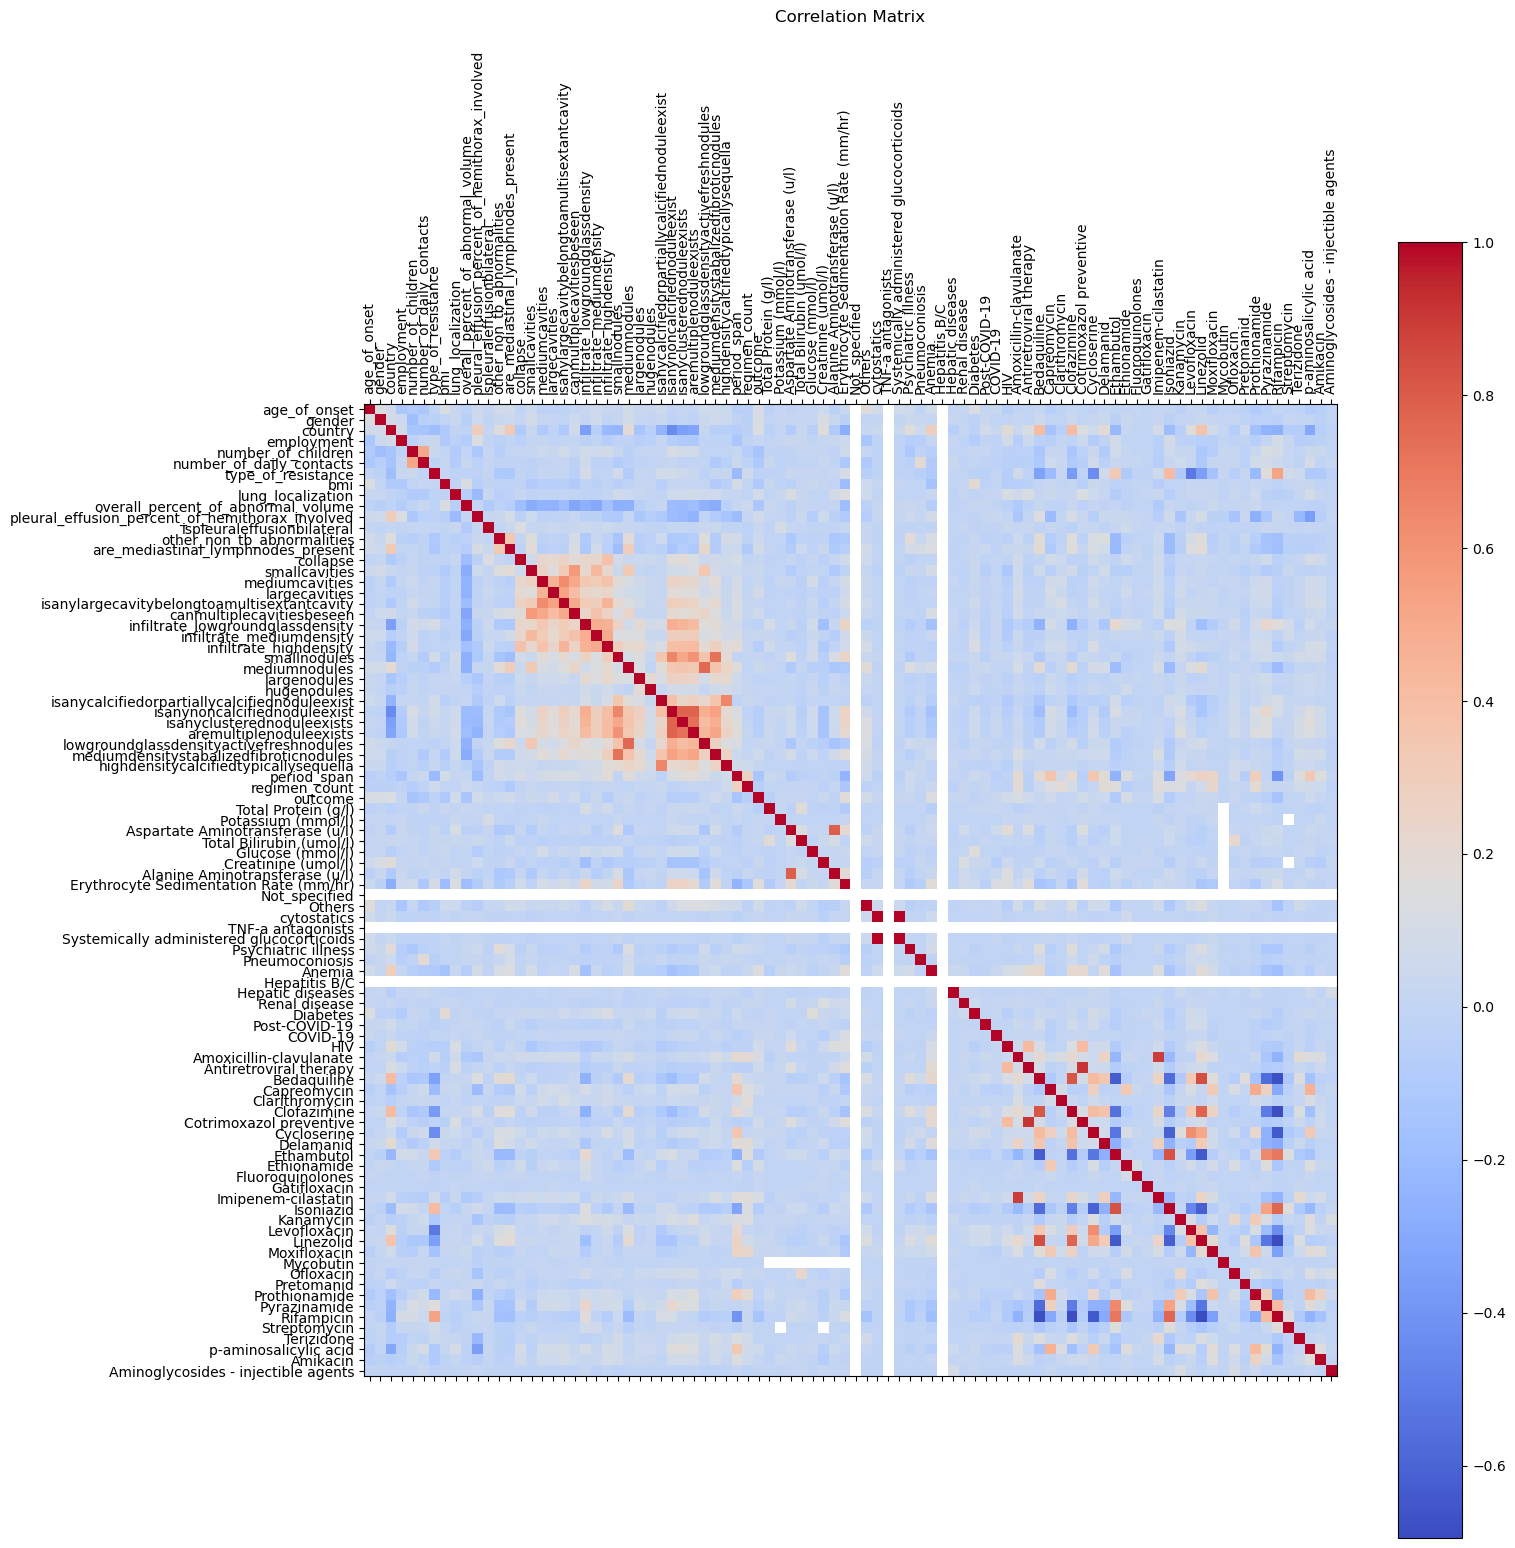

In [73]:
merged_data1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'merged_data1' is your DataFrame
corr_matrix = merged_data1.corr()

fig, ax = plt.subplots(figsize=(16, 16))  # Set size of the figure

# Create a heatmap
cax = ax.matshow(corr_matrix, cmap='coolwarm')  # 'coolwarm' is a visually pleasing colormap for correlation matrices

# Add colorbar to interpret values
fig.colorbar(cax)

# Set ticks and labels
ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)  # Rotate x-axis labels for better readability
ax.set_yticklabels(corr_matrix.columns)

# Optional: Add a title and adjust layout
plt.title('Correlation Matrix', pad=20)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


In [13]:
# Drop the specified values from the dataframe
# merged_data1 = pd.read_csv('./organised_data.csv')
merged_data1 = merged_data1.drop(columns = ['Not_specified', 'TNF-a antagonists', 'Hepatitis B/C'])

In [14]:
merged_data1 = merged_data1[['outcome','age_of_onset','gender','country','employment','number_of_children','number_of_daily_contacts','type_of_resistance','bmi','lung_localization','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','largenodules','hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabalizedfibroticnodules','highdensitycalcifiedtypicallysequella','period_span','regimen_count','Total Protein (g/l)','Potassium (mmol/l)','Aspartate Aminotransferase (u/l)','Total Bilirubin (umol/l)','Glucose (mmol/l)','Creatinine (umol/l)','Alanine Aminotransferase (u/l)','Erythrocyte Sedimentation Rate (mm/hr)','Others','cytostatics','Systemically administered glucocorticoids','Psychiatric illness','Pneumoconiosis','Anemia','Hepatic diseases','Renal disease','Diabetes','Post-COVID-19','COVID-19','HIV','Amoxicillin-clavulanate','Antiretroviral therapy','Bedaquiline','Capreomycin','Clarithromycin','Clofazimine','Cotrimoxazol preventive','Cycloserine','Delamanid','Ethambutol','Ethionamide','Fluoroquinolones','Gatifloxacin','Imipenem-cilastatin','Isoniazid','Kanamycin','Levofloxacin','Linezolid','Moxifloxacin','Mycobutin','Ofloxacin','Pretomanid','Prothionamide','Pyrazinamide','Rifampicin','Streptomycin','Terizidone','p-aminosalicylic acid','Amikacin','Aminoglycosides - injectible agents']]

In [1]:
from lazypredict.Supervised import LazyClassifier


OSError: dlopen(/Users/linfengwang/opt/anaconda3/envs/ml-air3/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <C3EB28DD-60B6-3334-AFA2-72BBBF9DBAEF> /Users/linfengwang/opt/anaconda3/envs/ml-air3/lib/python3.12/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

### Genomic_data

In [25]:
genomic_genomic = pd.read_csv('../Genomic/TB_Portals_Published_Genomics_Data_August_2023/TB_Portals_Genomics_August_2023.csv') # genomic info lin, dr, snp etc. + outcome
genomic_DST = pd.read_csv('../Genomic/TB_Portals_Published_Genomics_Data_August_2023/TB_Portals_Sequenced_DST_August_2023.csv') # methodology - no use

/mnt/storageG1/lwang/miniconda3/envs/ml-g1/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (33,40,41,55,60,66,68,71,72,82,106,109,110,111,113,119,125,127,128,129,130,131,132,134,135,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
